# Capstone Project 1
# Lending Club Loan Status Analysis
## Part 3: Exploratory Data Analysis

Data Source: Kaggle Dataset -- Lending Club Loan Data  
URL: https://www.kaggle.com/wendykan/lending-club-loan-data  
Analyst: Eugene Wen

Exploratory Data Analysis (EDA) is conducted before modeling to:
1. Look the distribution of variables in the data.
2. Look for correlations between variables, and how they are related to the target variable.

In [25]:
# Load the cleaned dataset from Part 1 and Part 2
%run ./py/MakingTarget.py
%matplotlib inline

In [26]:
print(loan.info())
print(loan.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 48 columns):
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null datetime64[ns]
purpose                        887379 non-null object
addr_state                     887379 non-null object
dti        

### Numerical Features

Although most of the features have many 0's, the ranges seem to be reasonable. Through scaling the effects of different ranges of the features would be eliminated.

dti, however, shows an abnormal pattern. The maximum value is 9999, but this feature is debt to income (excluding mortgage and large loans). Therefore it should be investigated further.

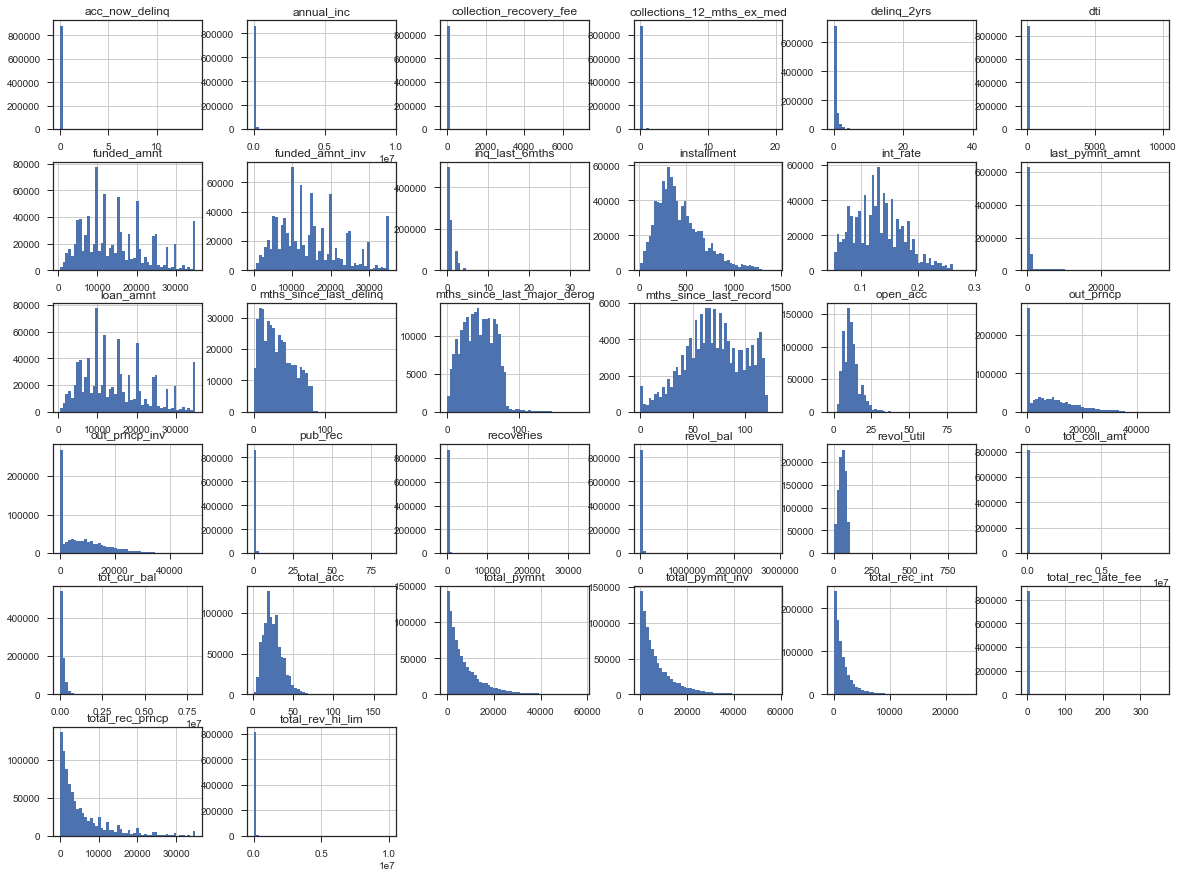

In [28]:
loan.hist(bins=50, figsize=(20, 15))
plt.show()

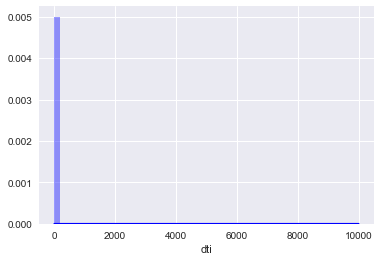

In [35]:
# Check dti distributions

sns.set()
sns.distplot(loan.dti, kde=True, color="b")

In [45]:
loan.loc[loan["dti"] > 1, :]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status_simple
0,5000.0,5000.0,4975.000000,36,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,2011-12-01,credit_card,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.70,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,Good
2,2400.0,2400.0,2400.000000,36,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,2011-12-01,small_business,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.50,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,Good
3,10000.0,10000.0,10000.000000,36,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,2011-12-01,other,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.00,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.0000,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,0.0,NaN,NaN,NaN,Good
4,3000.0,3000.0,3000.000000,60,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,2011-12-01,other,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.90,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,Good
5,5000.0,5000.0,5000.000000,36,0.0790,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,2011-12-01,wedding,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.30,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,2015-01-01,161.03,NaT,2015-09-01,0.0,NaN,0.0,NaN,NaN,NaN,Good
6,7000.0,7000.0,7000.000000,60,0.1596,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,2011-12-01,debt_consolidation,NC,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,85.60,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.0000,2016-01-01,170.08,2016-02-01,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN,Good
7,3000.0,3000.0,3000.000000,36,0.1864,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,2011-12-01,car,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221.0,87.50,4.0,f,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.0000,2015-01-01,111.34,NaT,2014-12-01,0.0,NaN,0.0,NaN,NaN,NaN,Good
8,5600.0,5600.0,5600.000000,60,0.2128,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,2011-12-01,small_business,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210.0,32.60,13.0,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,2012-04-01,152.39,NaT,2012-08-01,0.0,NaN,0.0,NaN,NaN,NaN,Bad
9,5375.0,5375.0,5350.000000,60,0.1269,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,2011-12-01,other,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279.0,36.50,3.0,f,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,2012-11-01,121.45,NaT,2013-03-01,0.0,NaN,0.0,NaN,NaN,NaN,Bad
10,6500.0,6500.0,6500.000000,60,0.1465,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.00,Not Verified,2011-12-01,debt_consolidation,AZ,16.12,0.0,Jan-1998,2.0,NaN,NaN,14.0,0.0,4032.0,20.60,23.0,f,0.00,0.00,7677.520000,7677.52,6500.00,1177.52,0.00,0.00,0.0000,2013-06-01,1655.54,NaT,2015-12-01,0.0,NaN,0.0,NaN,NaN,NaN,Good


### Categorical Features

In [54]:
# Construct a list of categorical features
cat_features = loan.select_dtypes(include=["object"]).columns

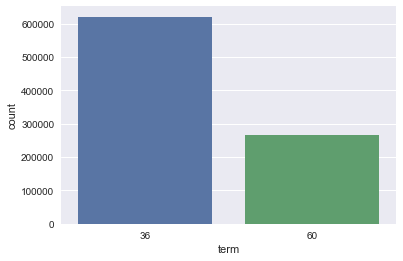

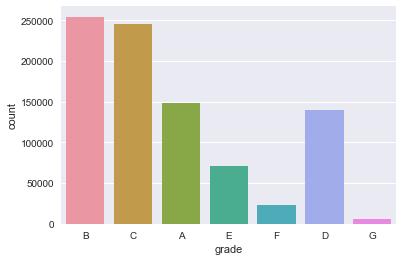

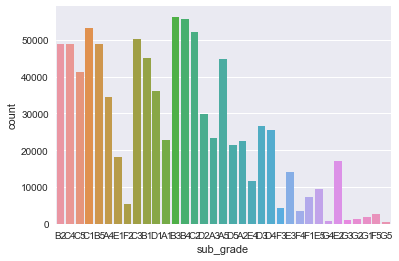

In [ ]:
for cf in cat_features:
    sns.set()
    sns.countplot(x=cf, data=loan)
    plt.show()

In [ ]:
sns.set()
sns.barplot(x="term", y="loan_status_simple", data=loan)
plt.show()

In [34]:
#selected = ["loan_amnt", "installment", "annual_inc", "loan_status_simple","term"]

#sns.set(style="ticks")
#sns.pairplot(loan[selected].sample(100), hue="term")

In [ ]:
# Drop date variables
exclude = ["issue_d", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d"]

### Initial Scatter Matrix
Scatter matrix is a very useful graph to look for feature distributions and their correlations. Coloring the loan_status_simple groups on the plots gives an intuition of potential contribution of a feature to the target prediction.

In [ ]:
# Potentially we can use the Good/Bad observations to score the Issued loans and estimate its risk of turning bad.
#loan_train = loan.loc[loan["loan_status"] != "Issued", :]
#loan_holdout = loan.loc[loan["loan_status"] == "Issued", :]
